In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [11]:
import os

print(os.path.exists('/Users/javieraquezada/Desktop/Retail Analysis/02 Data/cleaned_sample.pkl'))

True


In [12]:
df = pd.read_pickle('/Users/javieraquezada/Desktop/Retail Analysis/02 Data/cleaned_sample.pkl')

In [14]:
path ='/Users/javieraquezada/Desktop/Retail Analysis/02 Data'

In [15]:
df.head()

Transaction_ID  Customer_ID             Name                 Email  \
77037          8154457        18745      Tara Wright  Jeffrey100@gmail.com   
106765         8896002        82300    Daniel Patton  Cheyenne19@gmail.com   
187652         1820950        49584  Kathleen Watson     Billy97@gmail.com   
184582         9448636        74580  Steven Sullivan   Gabriel71@gmail.com   
290216         8088692        72061       Heather Yu    Daniel32@gmail.com   

               Phone                          Address        City  \
77037   6.443965e+09          474 Kevin Road Apt. 786     Chicago   
106765  1.792779e+09              717 Timothy Prairie    Brisbane   
187652  2.066960e+09  2069 Nicholas Prairie Suite 877  St. John's   
184582  8.490832e+09                912 Randall Manor   Saskatoon   
290216  7.141601e+09                1297 Willis Drive     Halifax   

                  State  Zipcode    Country  ...  Total_Amount  \
77037       Connecticut  14063.0        USA  ...   2350.802482   
106765  New South Wales  82508.0  Australia  ...    605.991344   
187652          Ontario  61208.0     Canada  ...    676.659578   
184582          Ontario  53361.0     Canada  ...    272.016496   
290216          Ontario  64745.0     Canada  ...   2394.895305   

       Product_Category      Product_Brand Product_Type   Feedback  \
77037             Books      HarperCollins      Fiction  Excellent   
106765         Clothing               Zara        Jeans  Excellent   
187652          Grocery              Pepsi        Water        Bad   
184582       Home Decor  Bed Bath & Beyond      Bedding        Bad   
290216          Grocery             Nestle       Snacks       Good   

        Shipping_Method Payment_Method Order_Status  Ratings  \
77037          Standard         PayPal   Processing      5.0   
106765         Same-Day     Debit Card      Shipped      5.0   
187652         Standard    Credit Card      Shipped      1.0   
184582         Standard    Credit Card      Shipped      1.0   
290216         Standard     Debit Card      Shipped      4.0   

                  products  
77037   Historical fiction  
106765      Wide-leg jeans  
187652       Mineral water  
184582     Mattress topper  
290216               Chips  

[5 rows x 30 columns]

In [17]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [18]:
# 2.Drop non-informative columns
df_viz = df.drop(columns=['Transaction_ID', 'Customer_ID', 'Date', 'Time', 'Name', 'Email', 'Phone', 'Address', 'Zipcode'])

In [19]:
#3.Correlation Heat Map
plt.figure(figsize=(10,8))
corr = df_viz.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

ValueError: could not convert string to float: 'Chicago'

<Figure size 1000x800 with 0 Axes>

In [24]:
## Data Frame still contains non numeric columns and correlation only works on numerical data.
##Grabbing only numeric data types
numeric_df = df_viz.select_dtypes(include=['number'])

In [22]:
corr = numeric_df.corr()

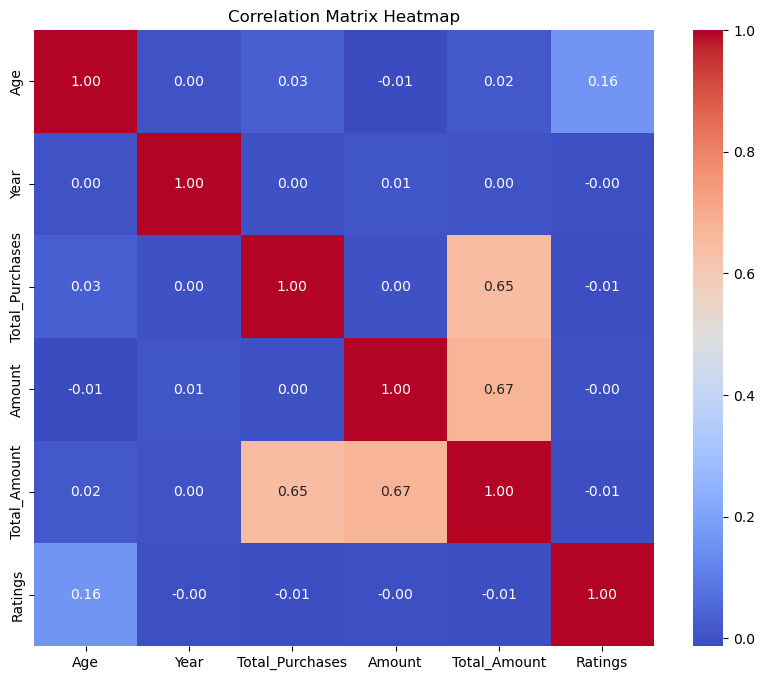

In [25]:
## 2nd attempt of Heat map
plt.figure(figsize=(10,8))
numeric_df = df_viz.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
### Correlation Heatmap(Interpretation)

#The heatmap shows how the numerical variables relate to each other.

#- The strongest positive correlations are:
 # - Total_Amount and Amount (0.67): Customers who spend more per transaction tend to have a higher total amount spent overall.
  #- Total_Amount and Total_Purchases (0.65): The more purchases someone makes, the more they spend in total. This makes sense.

#- There's a weak correlation between:
 # - Ratings and Age (0.16): Older customers might be giving slightly higher ratings, but the relationship is weak.

#- The rest of the variables show almost no correlation or negative values. That means there's not much of a linear relationship between them, at least not in a way we can see here.

#This helps narrow down which variables are worth exploring further.

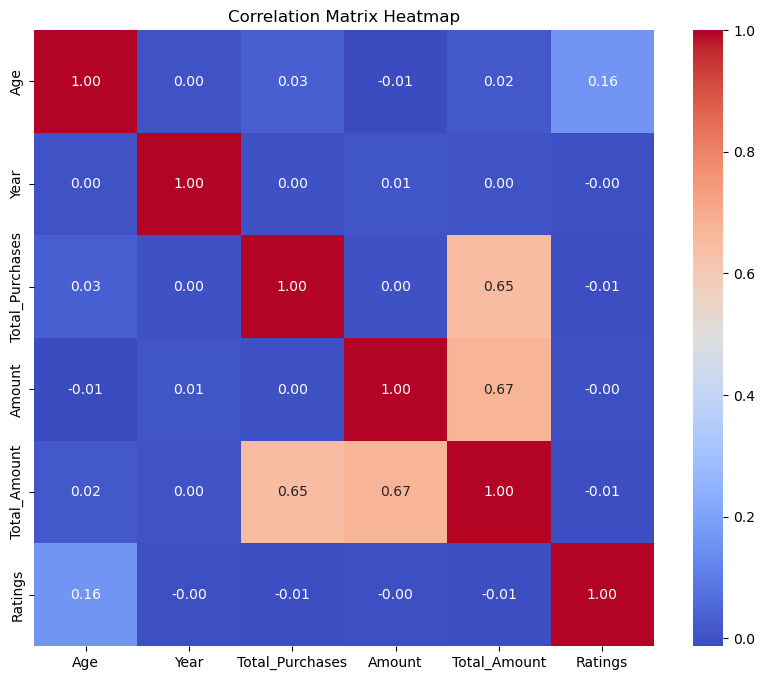

In [30]:
plt.figure(figsize=(10,8))
numeric_df = df_viz.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

# Save 
plt.savefig('/Users/javieraquezada/Desktop/correlation_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()

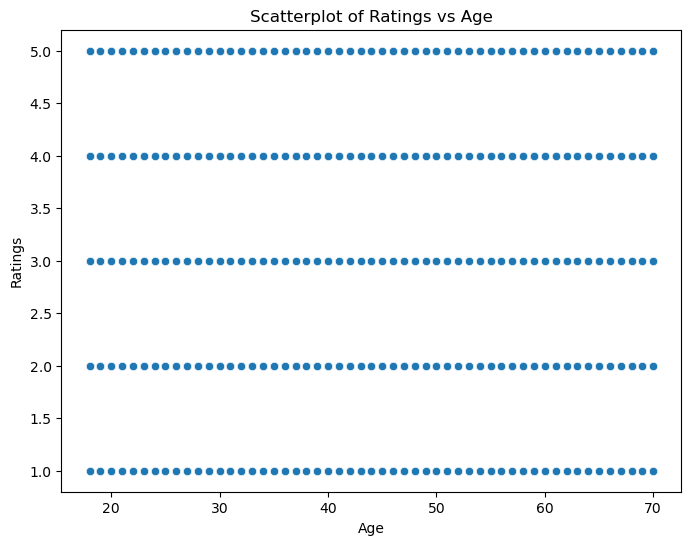

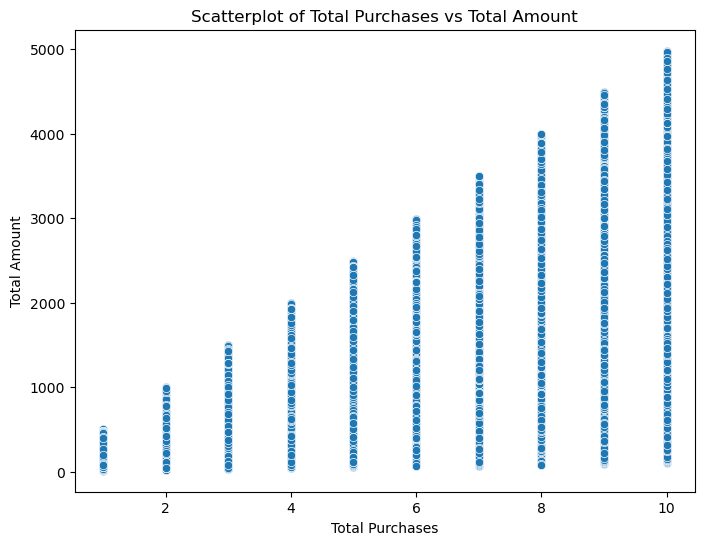

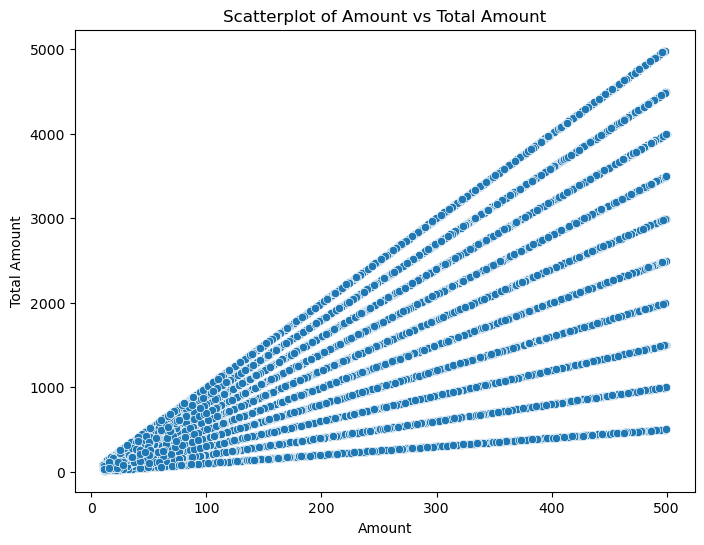

In [31]:
# 4.Creating ScatterPlot  for the variables with the stronges correlations 
# 1. Ratings vs Age
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_viz, x='Age', y='Ratings')
plt.title('Scatterplot of Ratings vs Age')
plt.xlabel('Age')
plt.ylabel('Ratings')
plt.show()

# 2. Total_Amount vs Total_Purchases
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_viz, x='Total_Purchases', y='Total_Amount')
plt.title('Scatterplot of Total Purchases vs Total Amount')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount')
plt.show()

# 3. Total_Amount vs Amount
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_viz, x='Amount', y='Total_Amount')
plt.title('Scatterplot of Amount vs Total Amount')
plt.xlabel('Amount')
plt.ylabel('Total Amount')
plt.show()

In [34]:
### Scatterplots (interpretation)

#After checking the correlation matrix, I created 3 scatterplots to look deeper into the strongest relationships:

#1. Age vs. Ratings – The correlation was weak (around 0.16), but I plotted it to see if there’s any pattern. 
#The plot shows a bit of spread but no strong visual trend, which confirms the low correlation.


#2.Total_Amount vs. Total_Purchases – There’s a clear upward trend: the more purchases someone makes, the more they’ve spent in total.
#Makes sense and supports the idea that loyal or frequent buyers drive higher revenue.

#3.Total_Amount vs. Amount – As the amount per purchase increases, the total amount spent also increases. 
#This confirms that customers who spend more on each order end up spending more overall.

#These plots helped confirm what I saw in the heatmap and also gave me a better visual understanding of how these spending 
#behaviors are connected.

In [35]:
# 5.Pairplot

In [36]:

# Selecting only numeric columns to avoid errors
numeric_df = df_viz.select_dtypes(include=['number'])

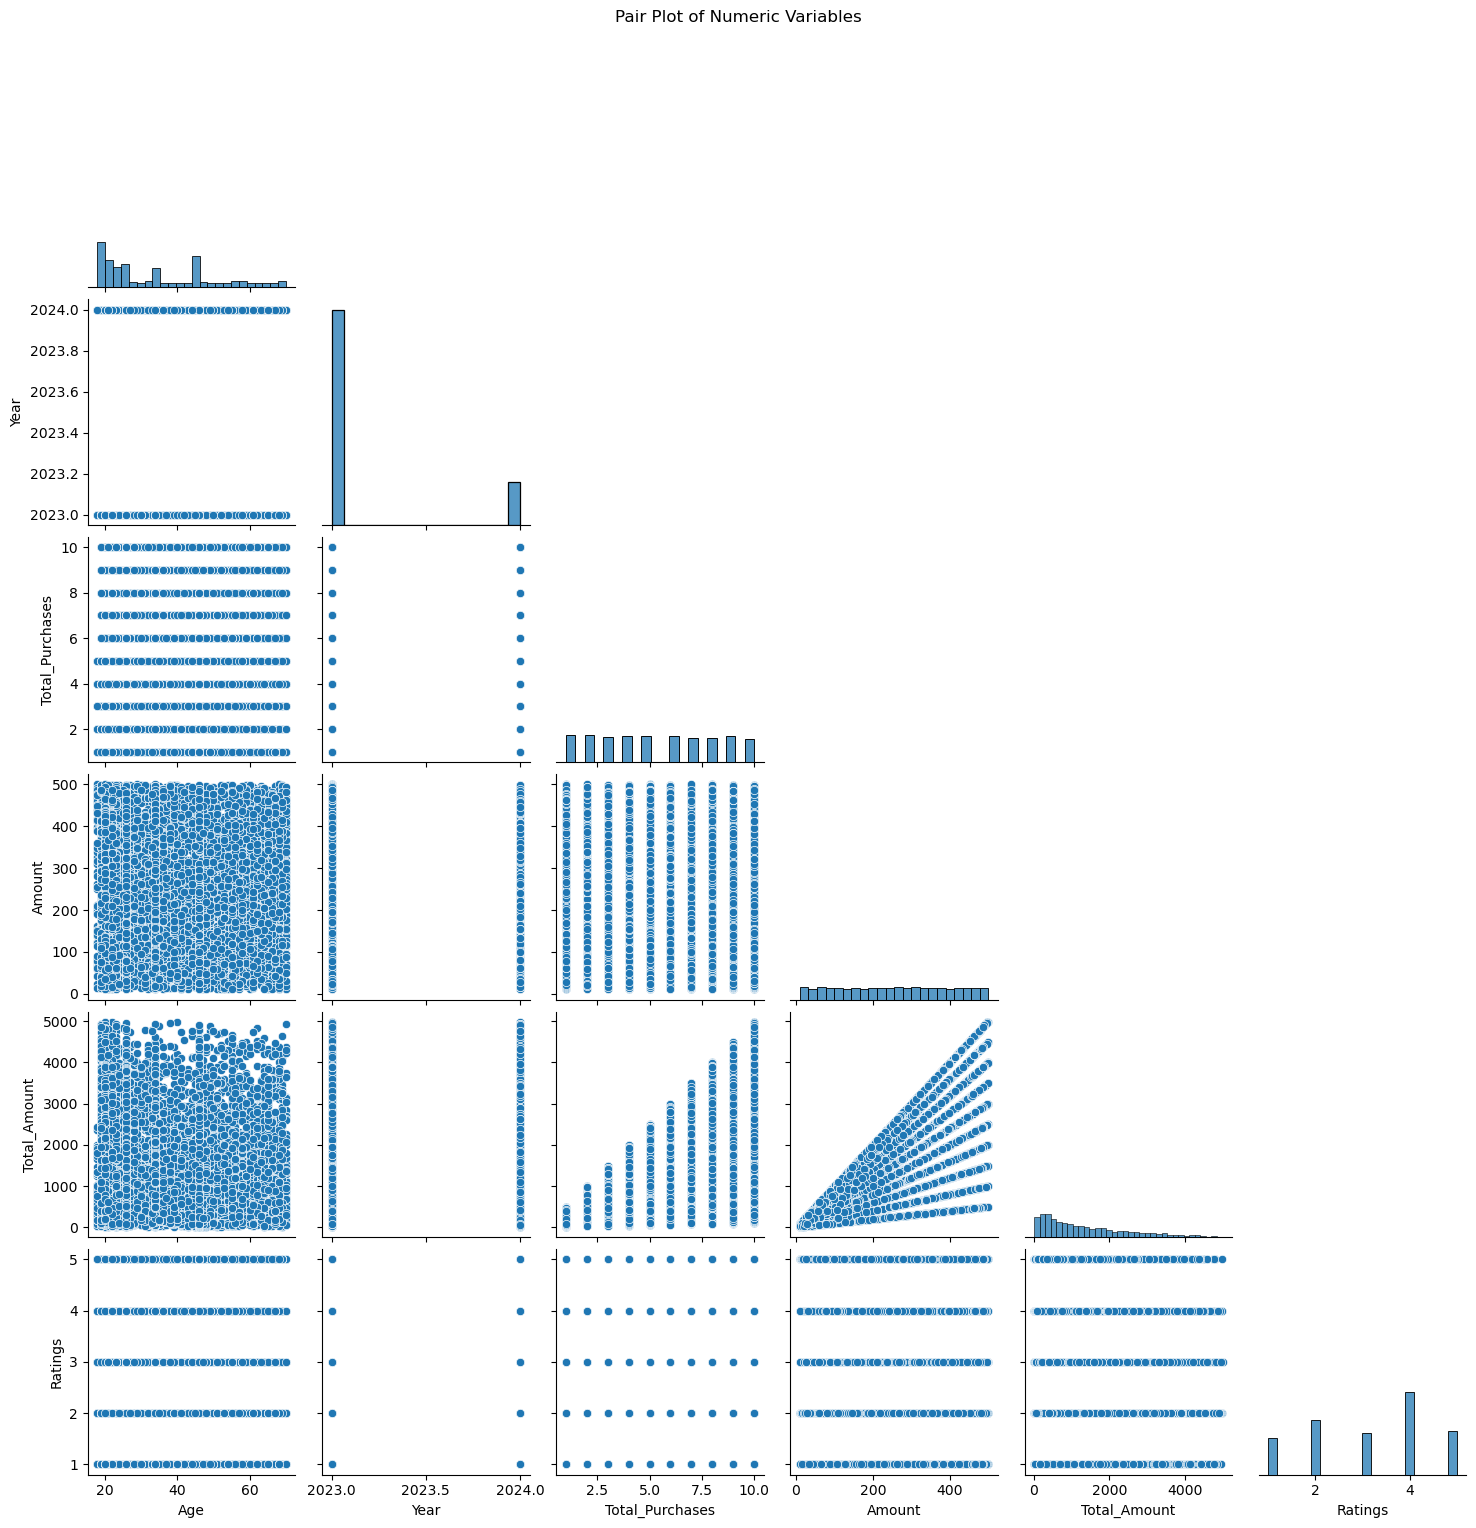

In [37]:
# Create pair plot
sns.pairplot(numeric_df, corner=True)
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

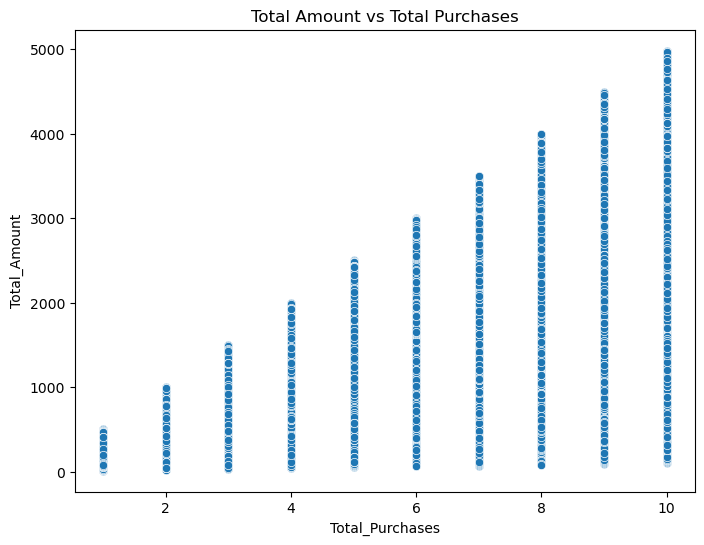

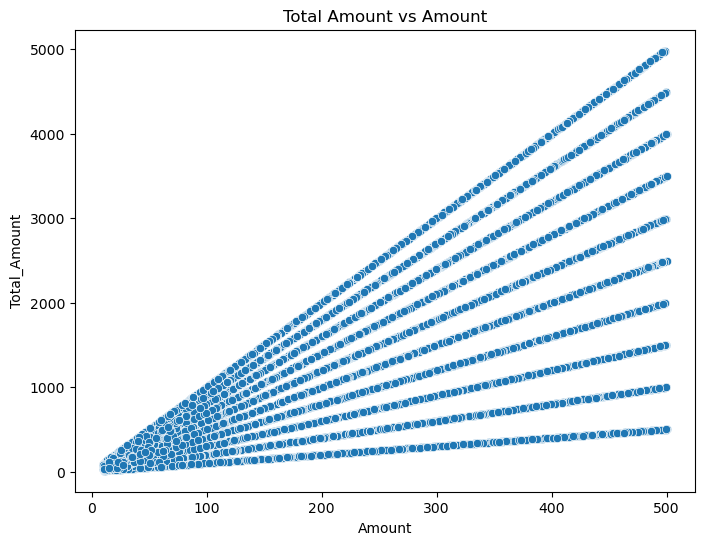

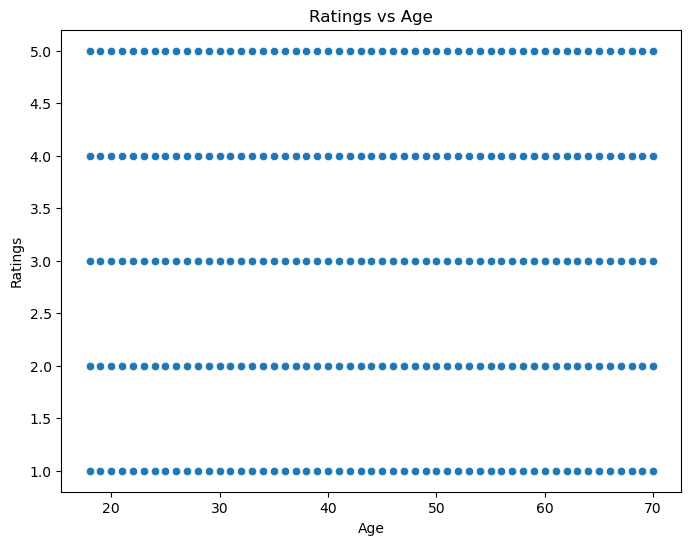

In [38]:
# Scatter plot 1: Total_Amount vs Total_Purchases
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total_Purchases', y='Total_Amount', data=df_viz)
plt.title('Total Amount vs Total Purchases')
plt.savefig('/Users/javieraquezada/Desktop/Total_Amount_vs_Total_Purchases.png')
plt.show()

# Scatter plot 2: Total_Amount vs Amount
plt.figure(figsize=(8,6))
sns.scatterplot(x='Amount', y='Total_Amount', data=df_viz)
plt.title('Total Amount vs Amount')
plt.savefig('/Users/javieraquezada/Desktop/Total_Amount_vs_Amount.png')
plt.show()

# Scatter plot 3: Ratings vs Age
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Ratings', data=df_viz)
plt.title('Ratings vs Age')
plt.savefig('/Users/javieraquezada/Desktop/Ratings_vs_Age.png')
plt.show()

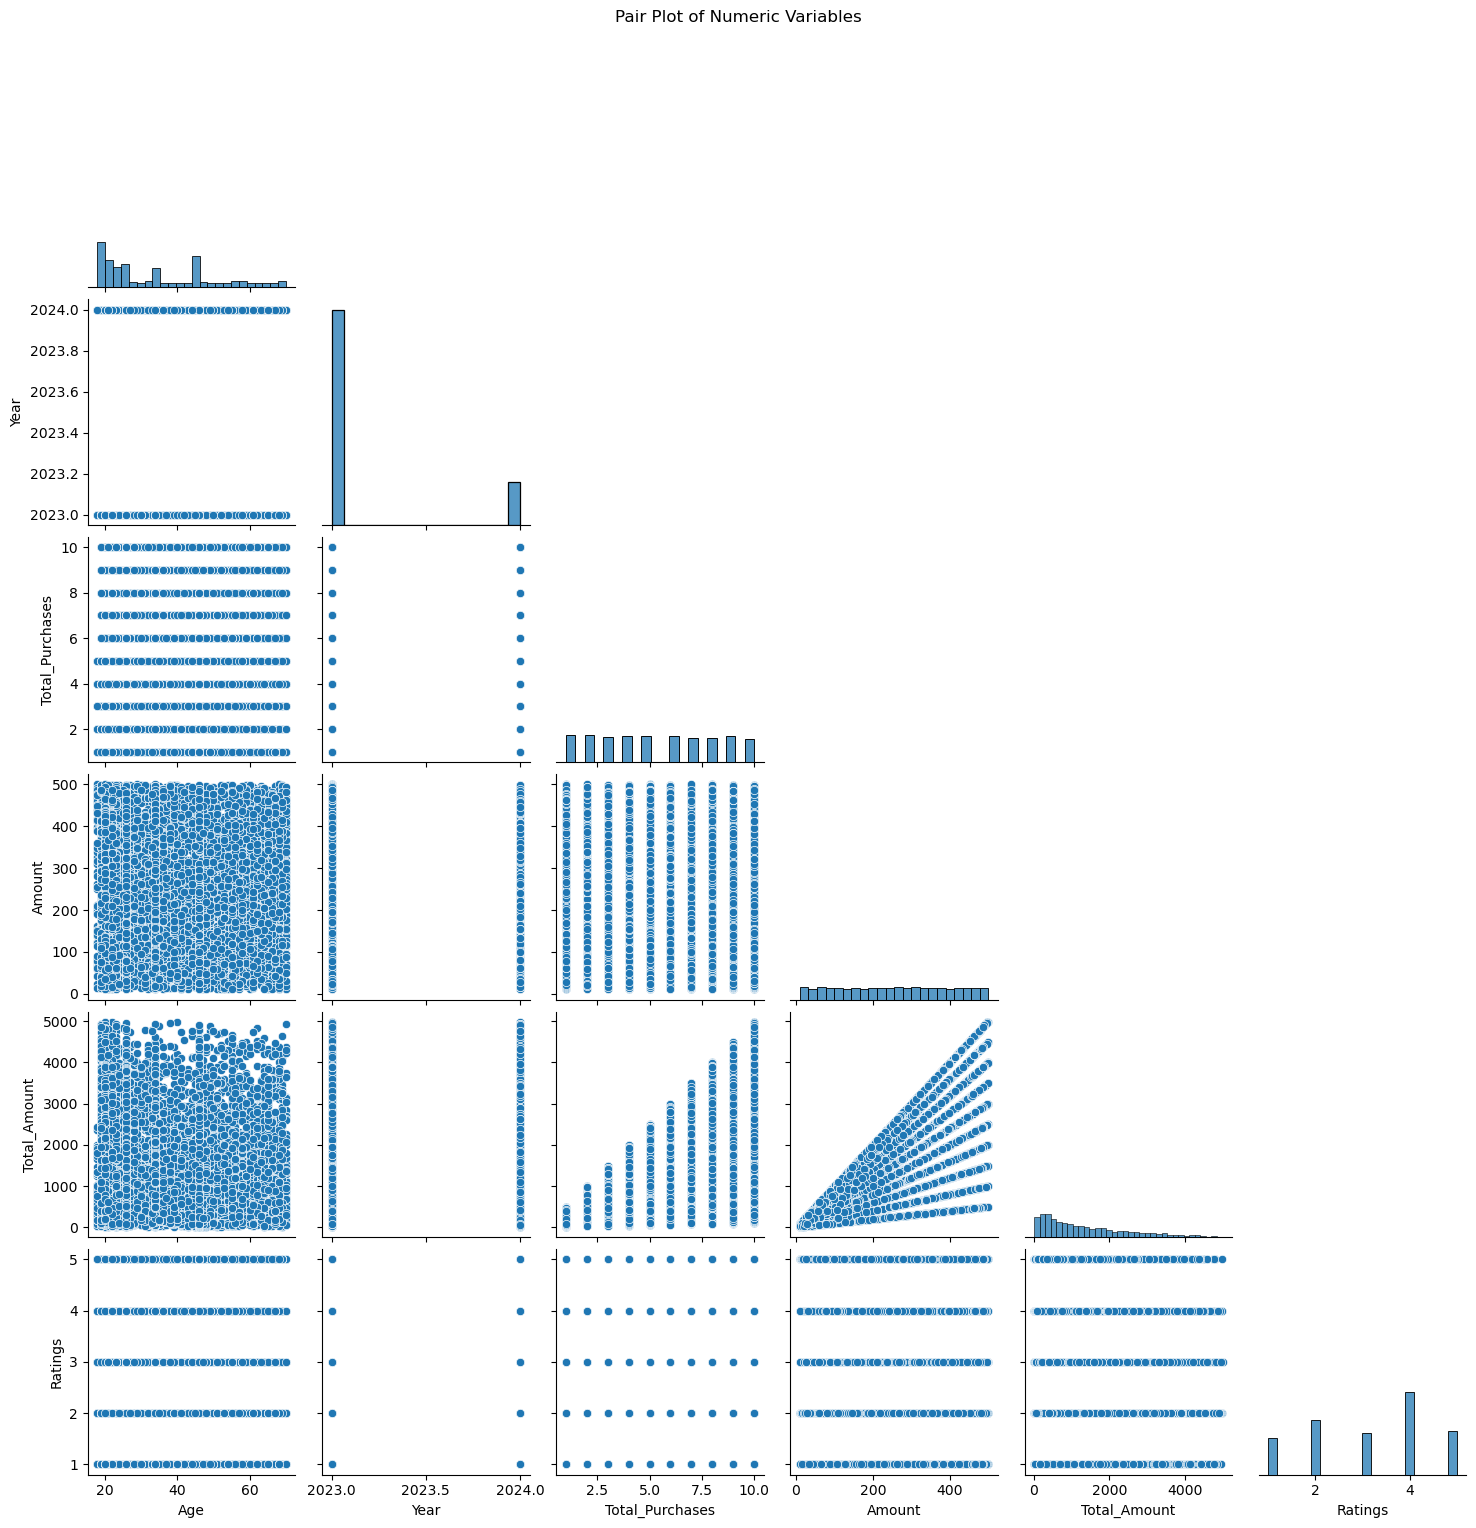

In [39]:
# Save pair plot
pair_plot = sns.pairplot(numeric_df, corner=True)
pair_plot.fig.suptitle("Pair Plot of Numeric Variables", y=1.02)

# Save the figure to Desktop
pair_plot.savefig('/Users/javieraquezada/Desktop/Pair_Plot_Numeric_Variables.png')

In [41]:
#PairPlot (interpretation)
#The pair plot displays the distribution and relationships between the main numeric variables in the dataset.
#From the diagonals, we can observe the skewness or symmetry of distributions. 
#The scatter plots below the diagonals show linear trends—particularly between Total_Amount, Amount, and Total_Purchases,
#which were already highlighted in the correlation matrix.

#Some other variables appear to have no clear linear pattern, confirming low or no correlation (as seen previously).
#I’ll keep Total_Amount, Total_Purchases, and Amount in mind for further exploration, 
#especially as they seem to reflect customer spending behavior.

#Based on this, I want to look deeper into:
#- Customers with very high Total_Amount – who are they?
#- Any link between low Ratings and Amount – are lower spenders less satisfied?
#- Differences in spending patterns by Age – maybe segment customers by age groups.

In [ ]:
##Categorical Plots.

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_40783/3915298199.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_purchases.index, y=brand_purchases.values, palette='viridis')


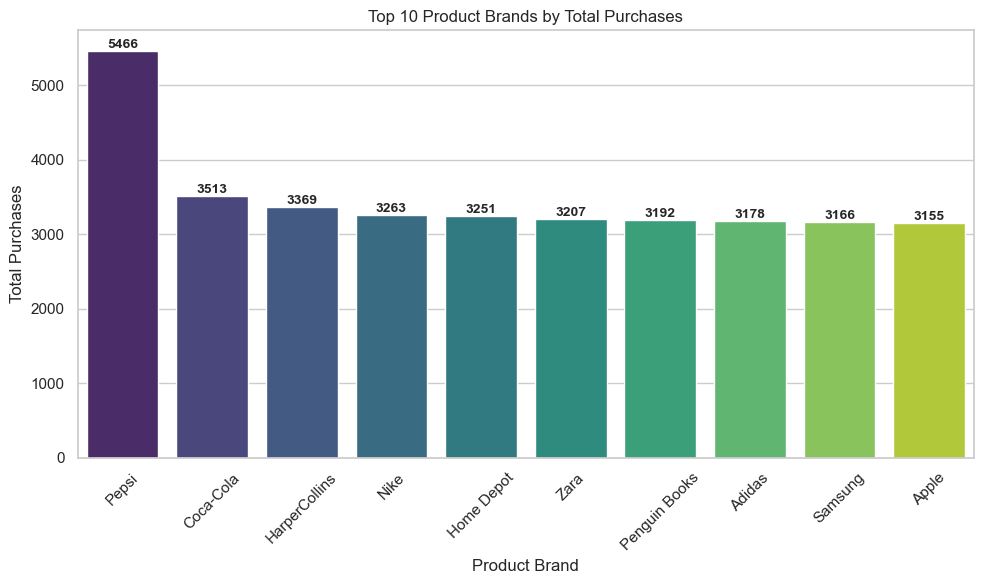

In [56]:
# Aggregate total purchases by brand and select top 10
brand_purchases = df.groupby('Product_Brand')['Total_Purchases'].sum().sort_values(ascending=False).head(10)

# Set up the plot
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = sns.barplot(x=brand_purchases.index, y=brand_purchases.values, palette='viridis')

# Add number tags on top of bars
for i, v in enumerate(brand_purchases.values):
    ax.text(i, v + 1, f'{int(v)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Titles and labels
plt.title('Top 10 Product Brands by Total Purchases')
plt.xlabel('Product Brand')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_40783/1176844156.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_purchases.index, y=brand_purchases.values, palette='viridis')


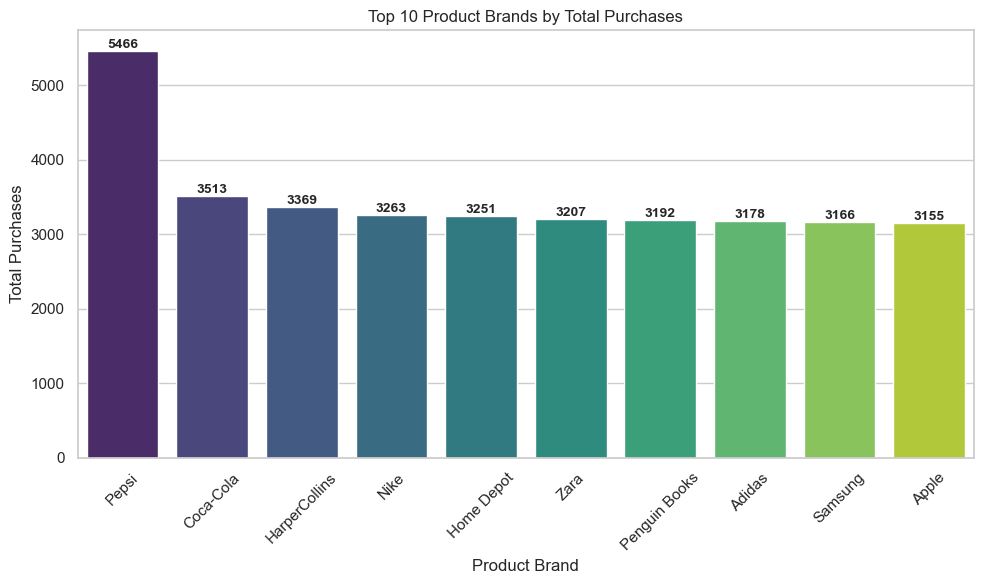

In [57]:
# Aggregate total purchases by brand and select top 10
brand_purchases = df.groupby('Product_Brand')['Total_Purchases'].sum().sort_values(ascending=False).head(10)

# Set up the plot
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = sns.barplot(x=brand_purchases.index, y=brand_purchases.values, palette='viridis')

# Add number tags on top of bars
for i, v in enumerate(brand_purchases.values):
    ax.text(i, v + 1, f'{int(v)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Titles and labels
plt.title('Top 10 Product Brands by Total Purchases')
plt.xlabel('Product Brand')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.tight_layout()

# 💾 Save the figure to your desktop or any custom path
plt.savefig('/Users/javieraquezada/Desktop/Top10_Brands_TotalPurchases.png', dpi=300)

# Show the plot
plt.show()

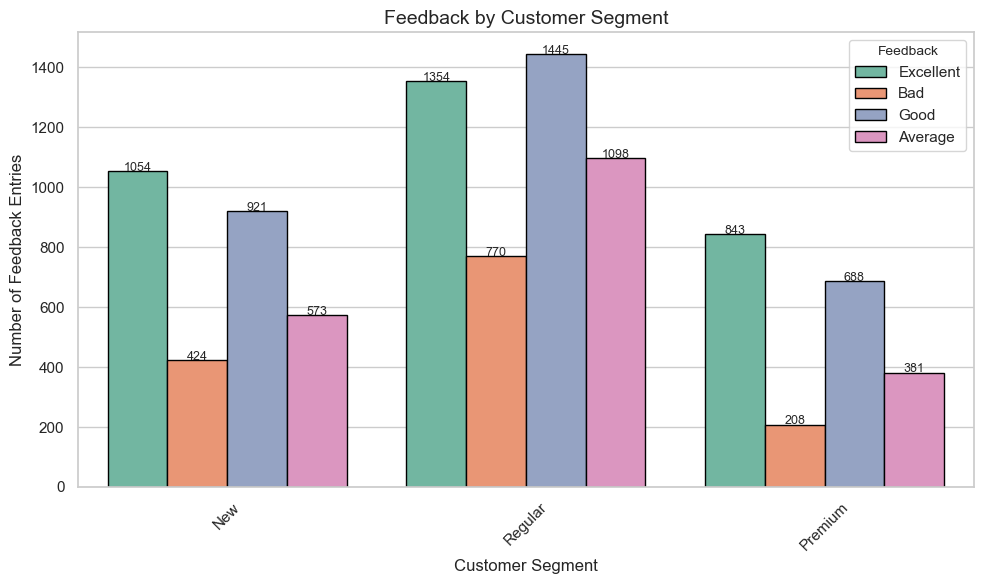

In [58]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

# Use a color palette and make bars more transparent to handle overlap
sns.countplot(
    x='Customer_Segment',
    hue='Feedback',
    data=df,
    palette='Set2',
    edgecolor='black'
)

# Add counts on top of the bars
from matplotlib.patches import Rectangle

# Loop through each bar and add text labels
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(
            p.get_x() + p.get_width() / 2.,
            height + 1,
            int(height),
            ha="center", fontsize=9
        )

plt.title('Feedback by Customer Segment', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Number of Feedback Entries')
plt.legend(title='Feedback', title_fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the improved plot
plt.savefig('/Users/javieraquezada/Desktop/Feedback_by_CustomerSegment.png', dpi=300)

plt.show()

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_40783/631633606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_avg, x='Country', y='Total_Amount', palette='Blues_d')


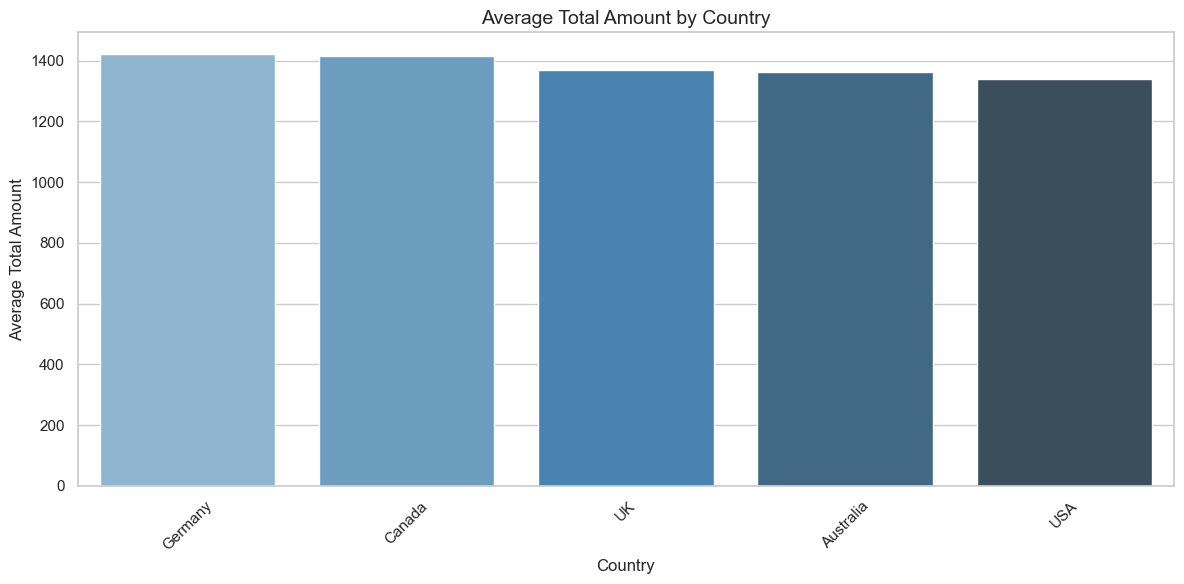

In [61]:
# Calculate mean Total_Amount by Country
country_avg = df.groupby('Country')['Total_Amount'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=country_avg, x='Country', y='Total_Amount', palette='Blues_d')

plt.title('Average Total Amount by Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('/Users/javieraquezada/Desktop/Average_TotalAmount_by_Country.png', dpi=300)

plt.show()

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_40783/545687189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Country', y='Total_Amount', data=df, palette='muted', size=4)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

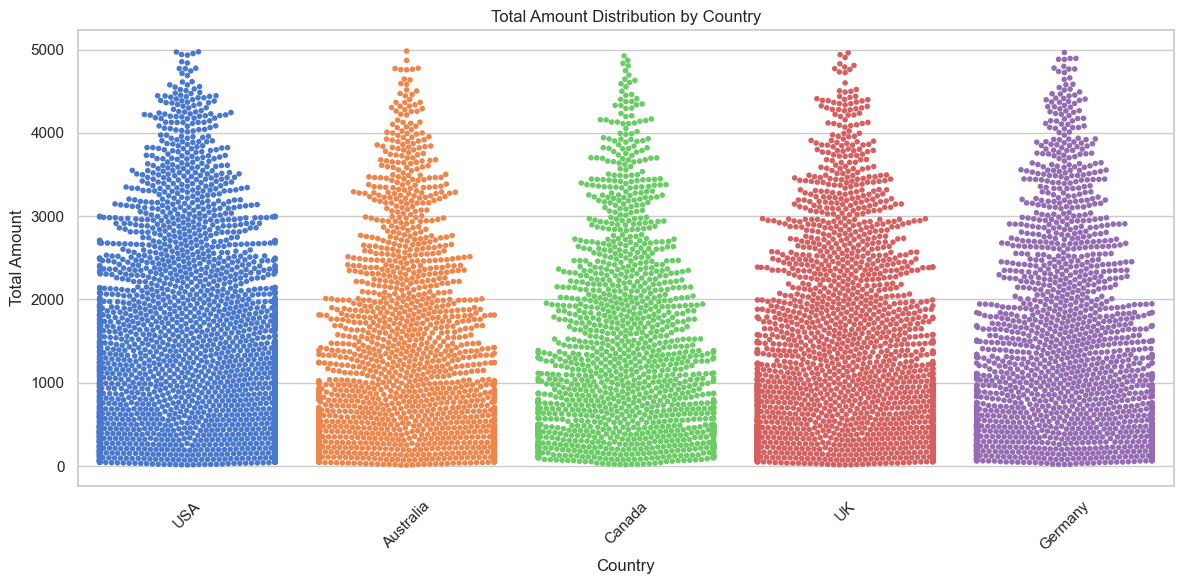

In [62]:
# Swarn plot 
plt.figure(figsize=(12,6))
sns.swarmplot(x='Country', y='Total_Amount', data=df, palette='muted', size=4)

plt.title('Total Amount Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Save if needed
plt.savefig('/Users/javieraquezada/Desktop/Swarm_TotalAmount_by_Country.png', dpi=300)

plt.show()

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_40783/1095130733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Country', y='Total_Amount', data=df, palette='muted', size=3, jitter=True)


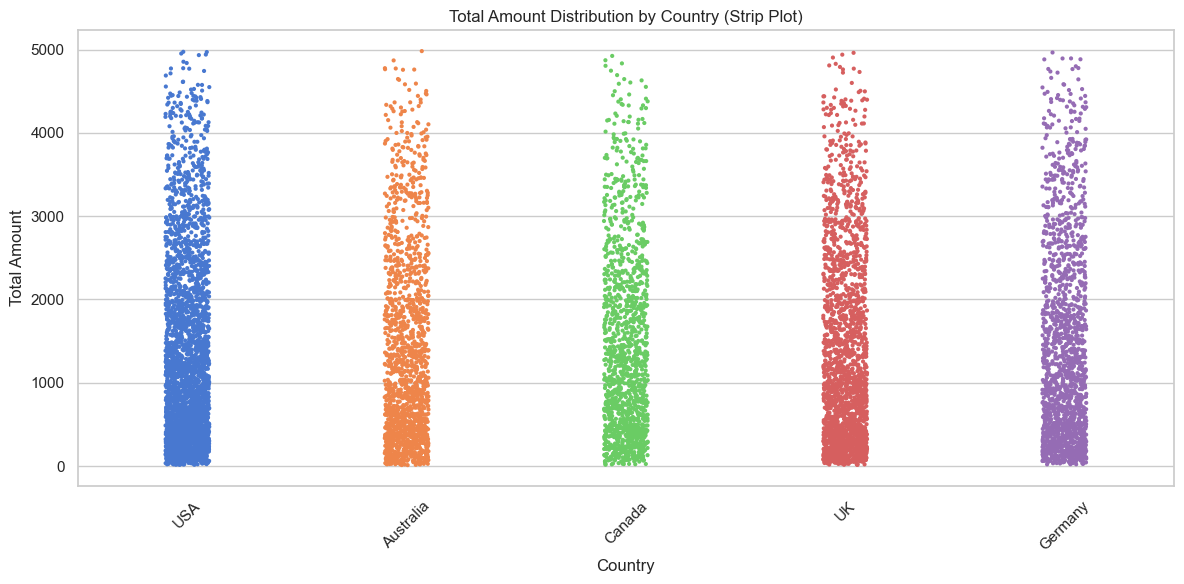

In [63]:
plt.figure(figsize=(12,6))
sns.stripplot(x='Country', y='Total_Amount', data=df, palette='muted', size=3, jitter=True)

plt.title('Total Amount Distribution by Country (Strip Plot)')
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('/Users/javieraquezada/Desktop/Strip_TotalAmount_by_Country.png', dpi=300)

plt.show()

In [66]:
## 7. Revisiting the key questions

In [67]:
#1. Which customer segments spend the most and have the highest satisfaction?

#From the Customer_Segment vs Feedback plot, Regular customers have the highest number of feedback entries, 
#indicating they are the most engaged segment in terms of providing feedback. 
#Following them are New customers, and then Premium customers.

#While Regular customers contribute the most feedback, it’s important to consider the nature of that feedback 
#(positive, neutral, or negative) to assess satisfaction levels accurately. 
#This high engagement suggests that Regular customers are actively interacting with the business, 
#which may correlate with consistent spending behavior.

#Further analysis combining feedback sentiment with spending data could clarify whether high feedback 
#volume aligns with higher satisfaction and spending. However, based on feedback volume alone, 
#Regular customers seem to be the most involved segment.


In [69]:
print(df['Customer_Segment'].unique())

['New' 'Regular' 'Premium']


In [70]:
#2. Which Product Categories generate the most revenue?

#Based on the analysis, the brands with the highest total purchases are led by Pepsi with 5,466 purchases, 
#followed by Coca-Cola at 3,513, and Harper Collins at 3,369. 
#Other top brands include Nike, Home Depot, Zara, and Penguin Books, each with purchases ranging from about 3,200 to 3,300.

#This suggests that beverage brands like Pepsi and Coca-Cola dominate in terms of purchase frequency, 
#likely reflecting strong customer demand or wide distribution. 
#Meanwhile, brands spanning apparel (Nike, Adidas, Zara), home improvement (Home Depot), 
#and publishing (Harper Collins, Penguin Books) also show strong customer engagement, 
#contributing substantially to overall revenue.

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_40783/878615712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_revenue_df, y='Product_Brand', x='Total_Amount', palette='coolwarm')


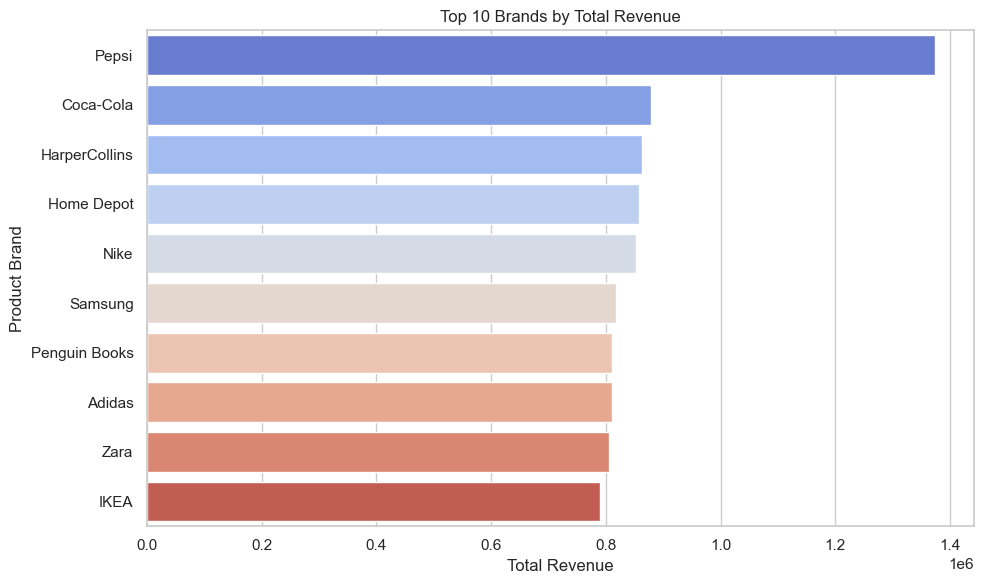

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(data=brand_revenue_df, y='Product_Brand', x='Total_Amount', palette='coolwarm')
plt.title('Top 10 Brands by Total Revenue')
plt.ylabel('Product Brand')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

/var/folders/n5/lt6zjw5j12s3tv1t42m14nqh0000gn/T/ipykernel_40783/736040832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_revenue_df, y='Product_Brand', x='Total_Amount', palette='coolwarm')


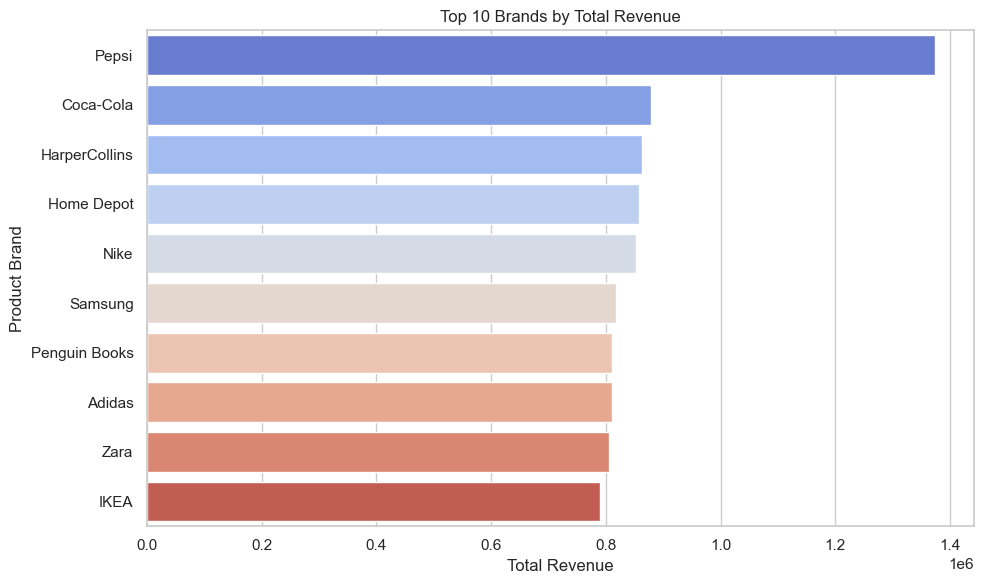

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(data=brand_revenue_df, y='Product_Brand', x='Total_Amount', palette='coolwarm')
plt.title('Top 10 Brands by Total Revenue')
plt.ylabel('Product Brand')
plt.xlabel('Total Revenue')
plt.tight_layout()

# Save the figure to your desktop (adjust path as needed)
plt.savefig('/Users/javieraquezada/Desktop/top_10_brands_revenue.png', dpi=300)

plt.show()

In [76]:
# 8. New Hypothesis

In [78]:
##Hypothesis 1: Customer segments differ significantly in their total spending and feedback ratings
##Hypothesis 2: Product brands with higher total purchases generate more revenue and have a stronger presence in the market.

In [79]:
##Hypothesis 3: Gender impacts buying behavior, with one gender spending more or making more purchases on average.

In [80]:
##Hypothesis 4:Customers from certain countries spend more on average than others due to economic or cultural factors.

In [ ]:
##Hypothesis 5:There is a positive correlation between the number of purchases and total amount spent.